## Khalil Koudary
### ID: 40088454

##### COMP 333: Data Analysis, Lab Assignment 1
##### Analyzing Restaurant Cusomter's Tipping Behaviours

###### Input Source: Professor's slides, Week 2 : Example 1, Page 2

###### Input includes infomation about the bill amount, tip amount, and customer & their party

In [8]:
# Importing appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Reading the csv file into a DataFrame df
df= pd.read_csv("tips.csv")

In [2]:
# Printing first 10 rows
print(df.head(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


In [31]:
#Adding column "tip_rate"
df['tip_rate']=(df['tip']/df['total_bill'])
print(df.head(10))

   total_bill   tip     sex smoker  day    time  size  tip_rate
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240
6        8.77  2.00    Male     No  Sun  Dinner     2  0.228050
7       26.88  3.12    Male     No  Sun  Dinner     4  0.116071
8       15.04  1.96    Male     No  Sun  Dinner     2  0.130319
9       14.78  3.23    Male     No  Sun  Dinner     2  0.218539


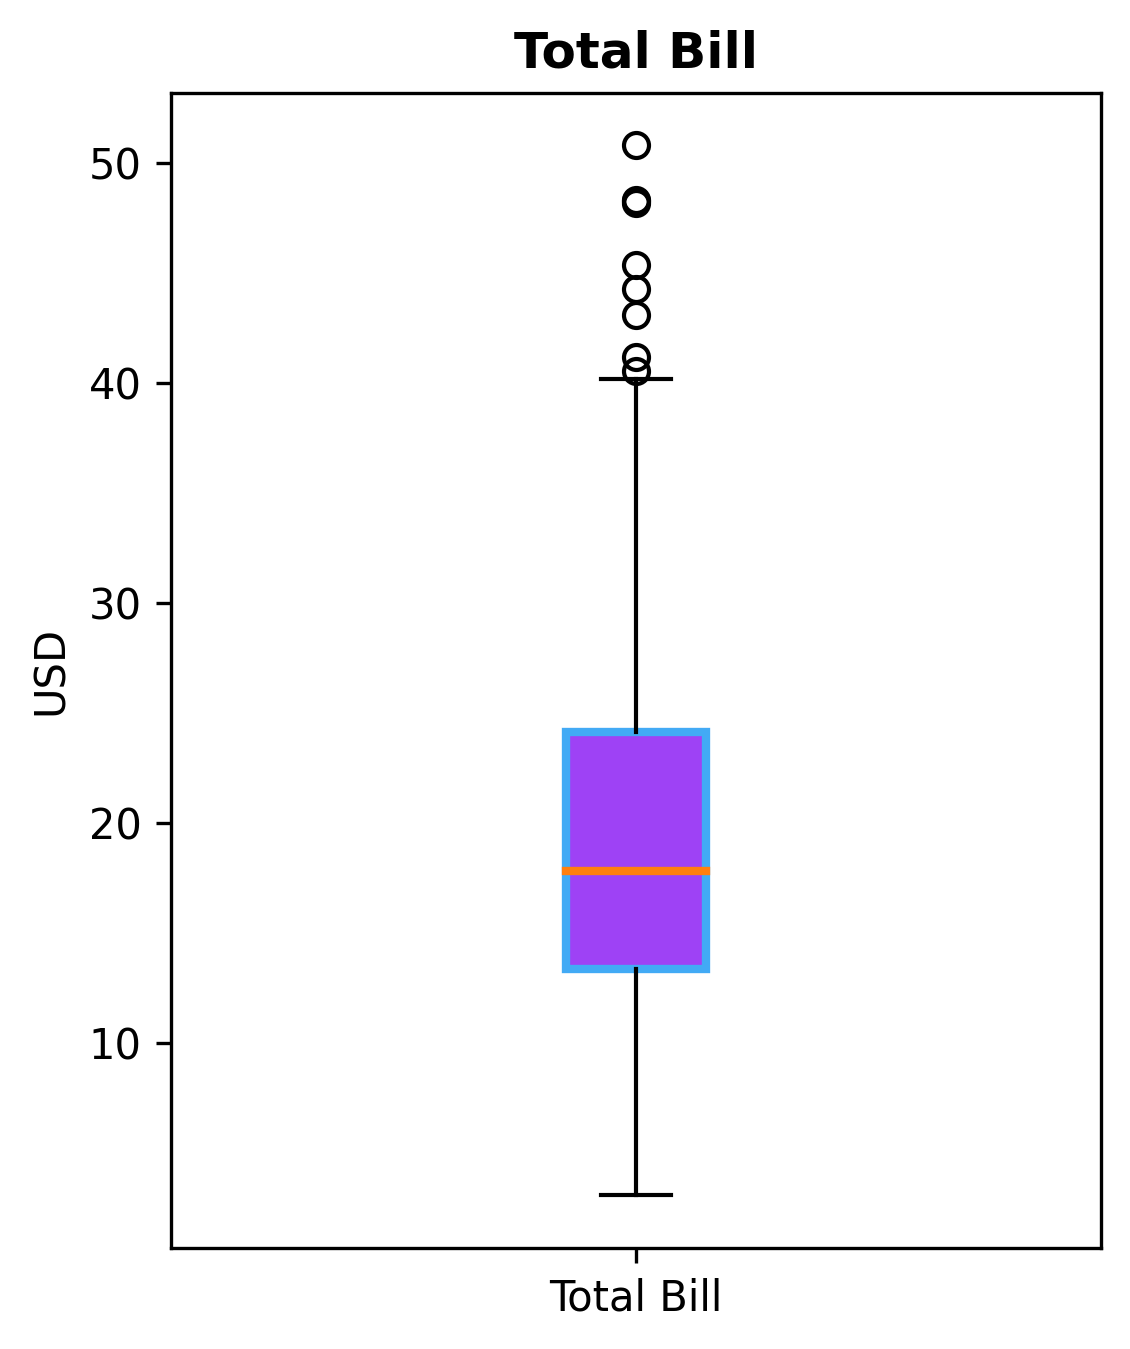

In [4]:
#box plot for the total bill
plt.figure(figsize=(4,5), dpi=300)

#creating box plot for total bill
boxes=plt.boxplot(df['total_bill'],labels=["Total Bill"], patch_artist=True, medianprops={'linewidth':2})

#adding some colors and features
for box in boxes['boxes']:
    box.set(color="#42aaf5", facecolor="#9e42f5", linewidth=2)
    
#Labeling Y Axis            
plt.ylabel("USD")

#Title
plt.title("Total Bill",fontdict={'fontweight':'bold'})

plt.show()

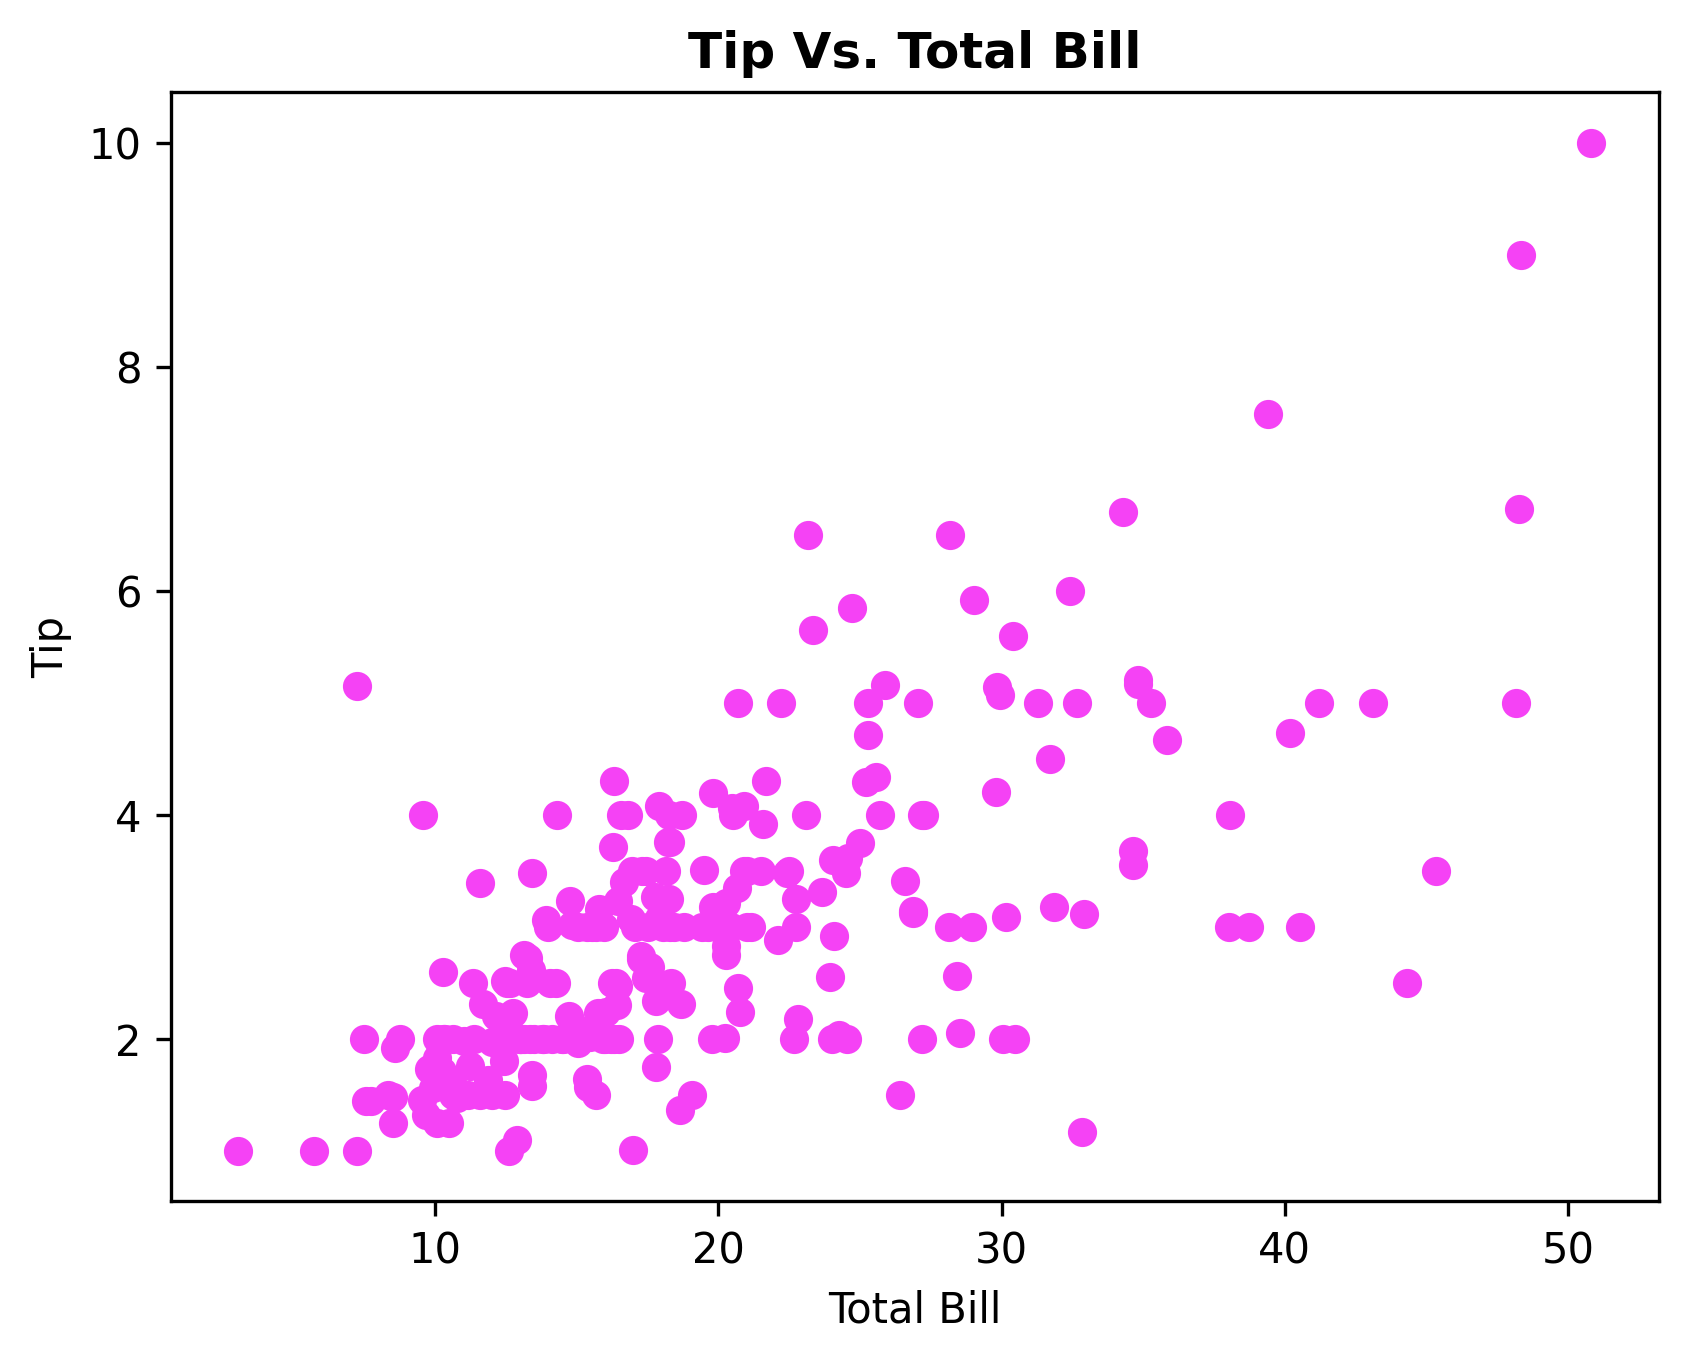

In [29]:
#scatter plot of tip vs total_bill
plt.figure(dpi=300)


#plotting tip vs total_bill
plt.scatter(df['total_bill'],df['tip'],c="#f542f5")


#Labeling
plt.xlabel('Total Bill')
plt.ylabel('Tip')


#Title
plt.title("Tip Vs. Total Bill", fontdict={'fontweight':'bold'})

plt.show()

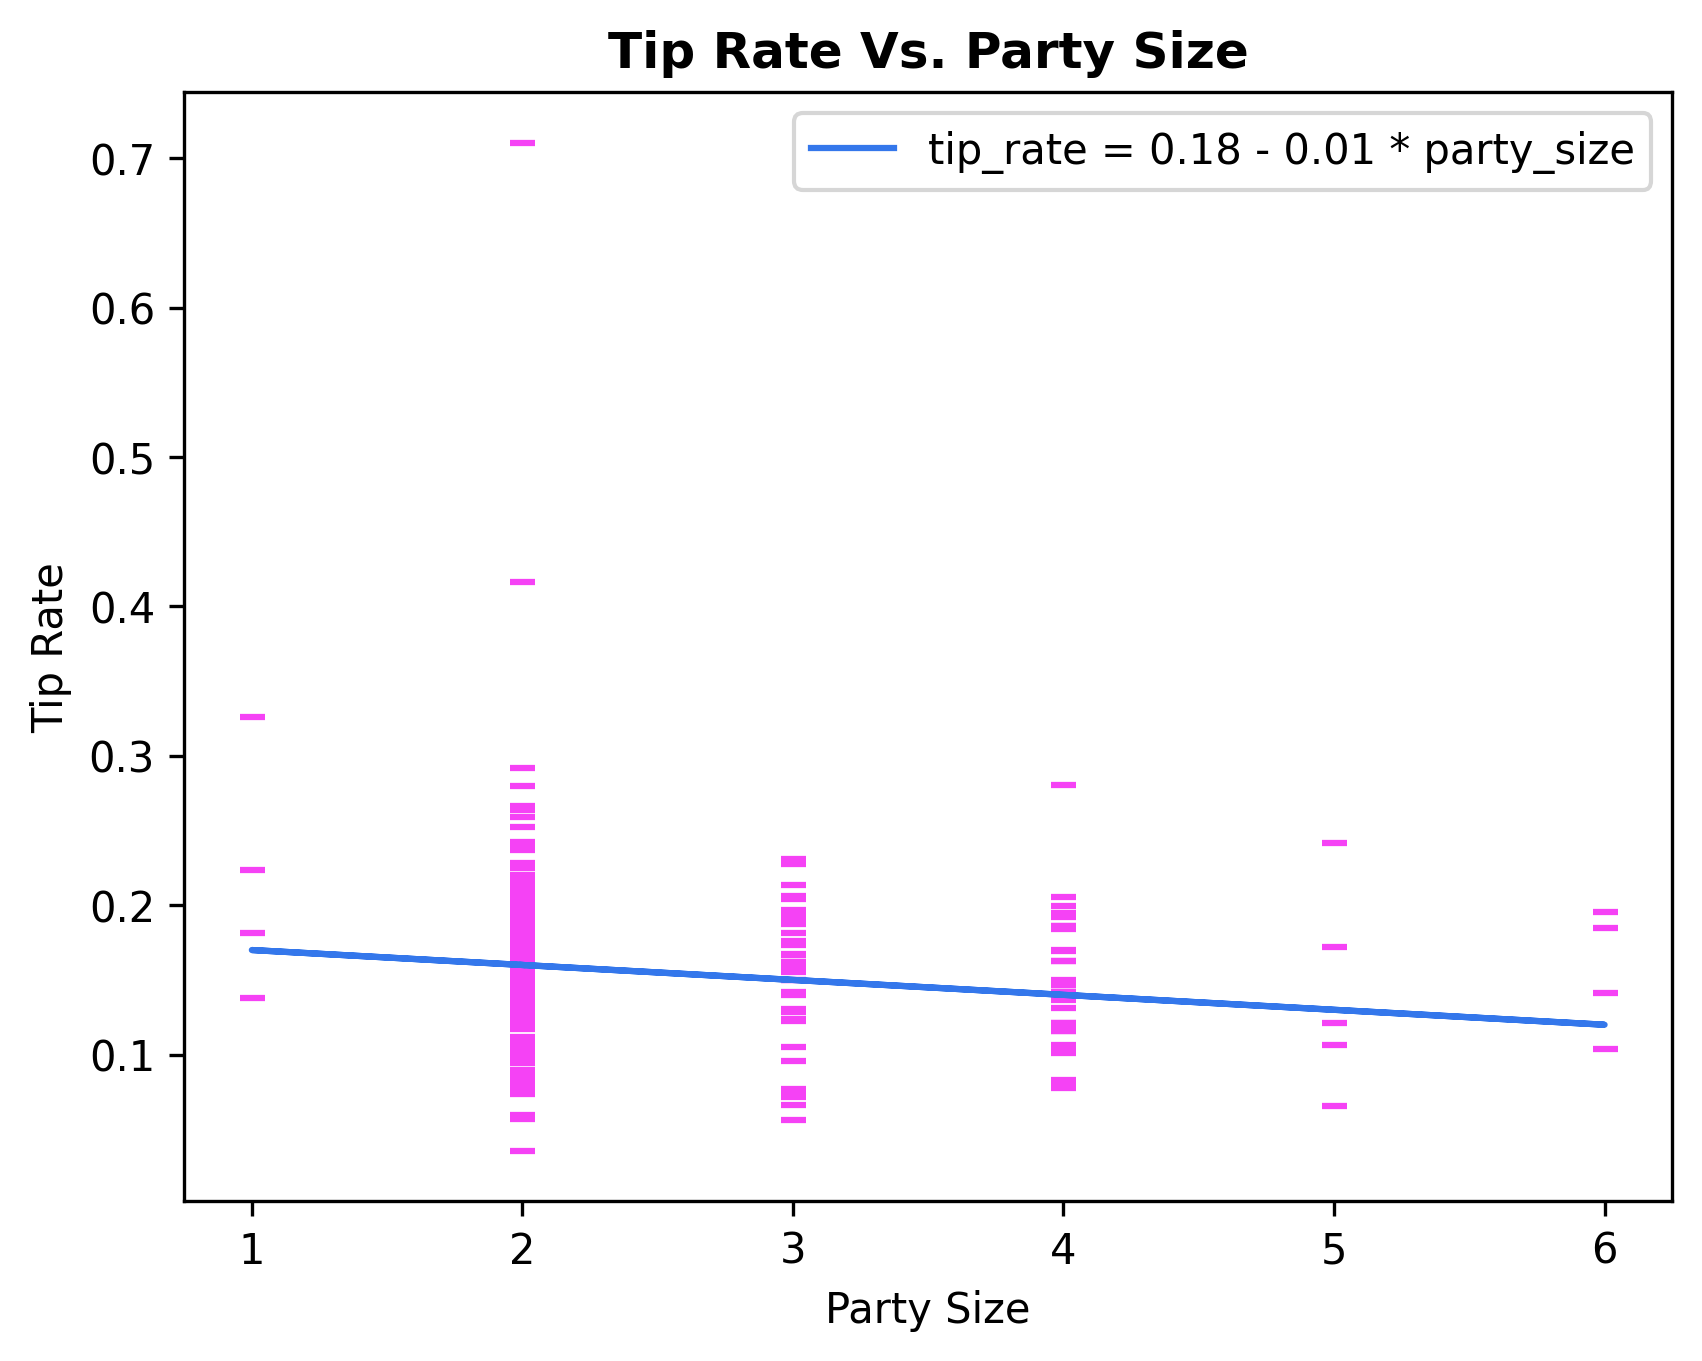

In [33]:
#scatter plot of tip rate vs party size
plt.figure(dpi=300)

#ploting tip_rate vs party size
plt.scatter(df['size'],df['tip_rate'],c="#f542f5", marker='_')

#labeling plot
plt.ylabel('Tip Rate')
plt.xlabel('Party Size')

#title
plt.title("Tip Rate Vs. Party Size", fontdict={'fontweight':'bold'})

#inserting the line into the plot
X=df['size']

#defining function
def func(x):
    return 0.18 - (0.01 * x)

Y=func(X)

#plotting the line
plt.plot(X,Y,'#3477eb', label="tip_rate = 0.18 - 0.01 * party_size")

#Legend
plt.legend()

plt.show()

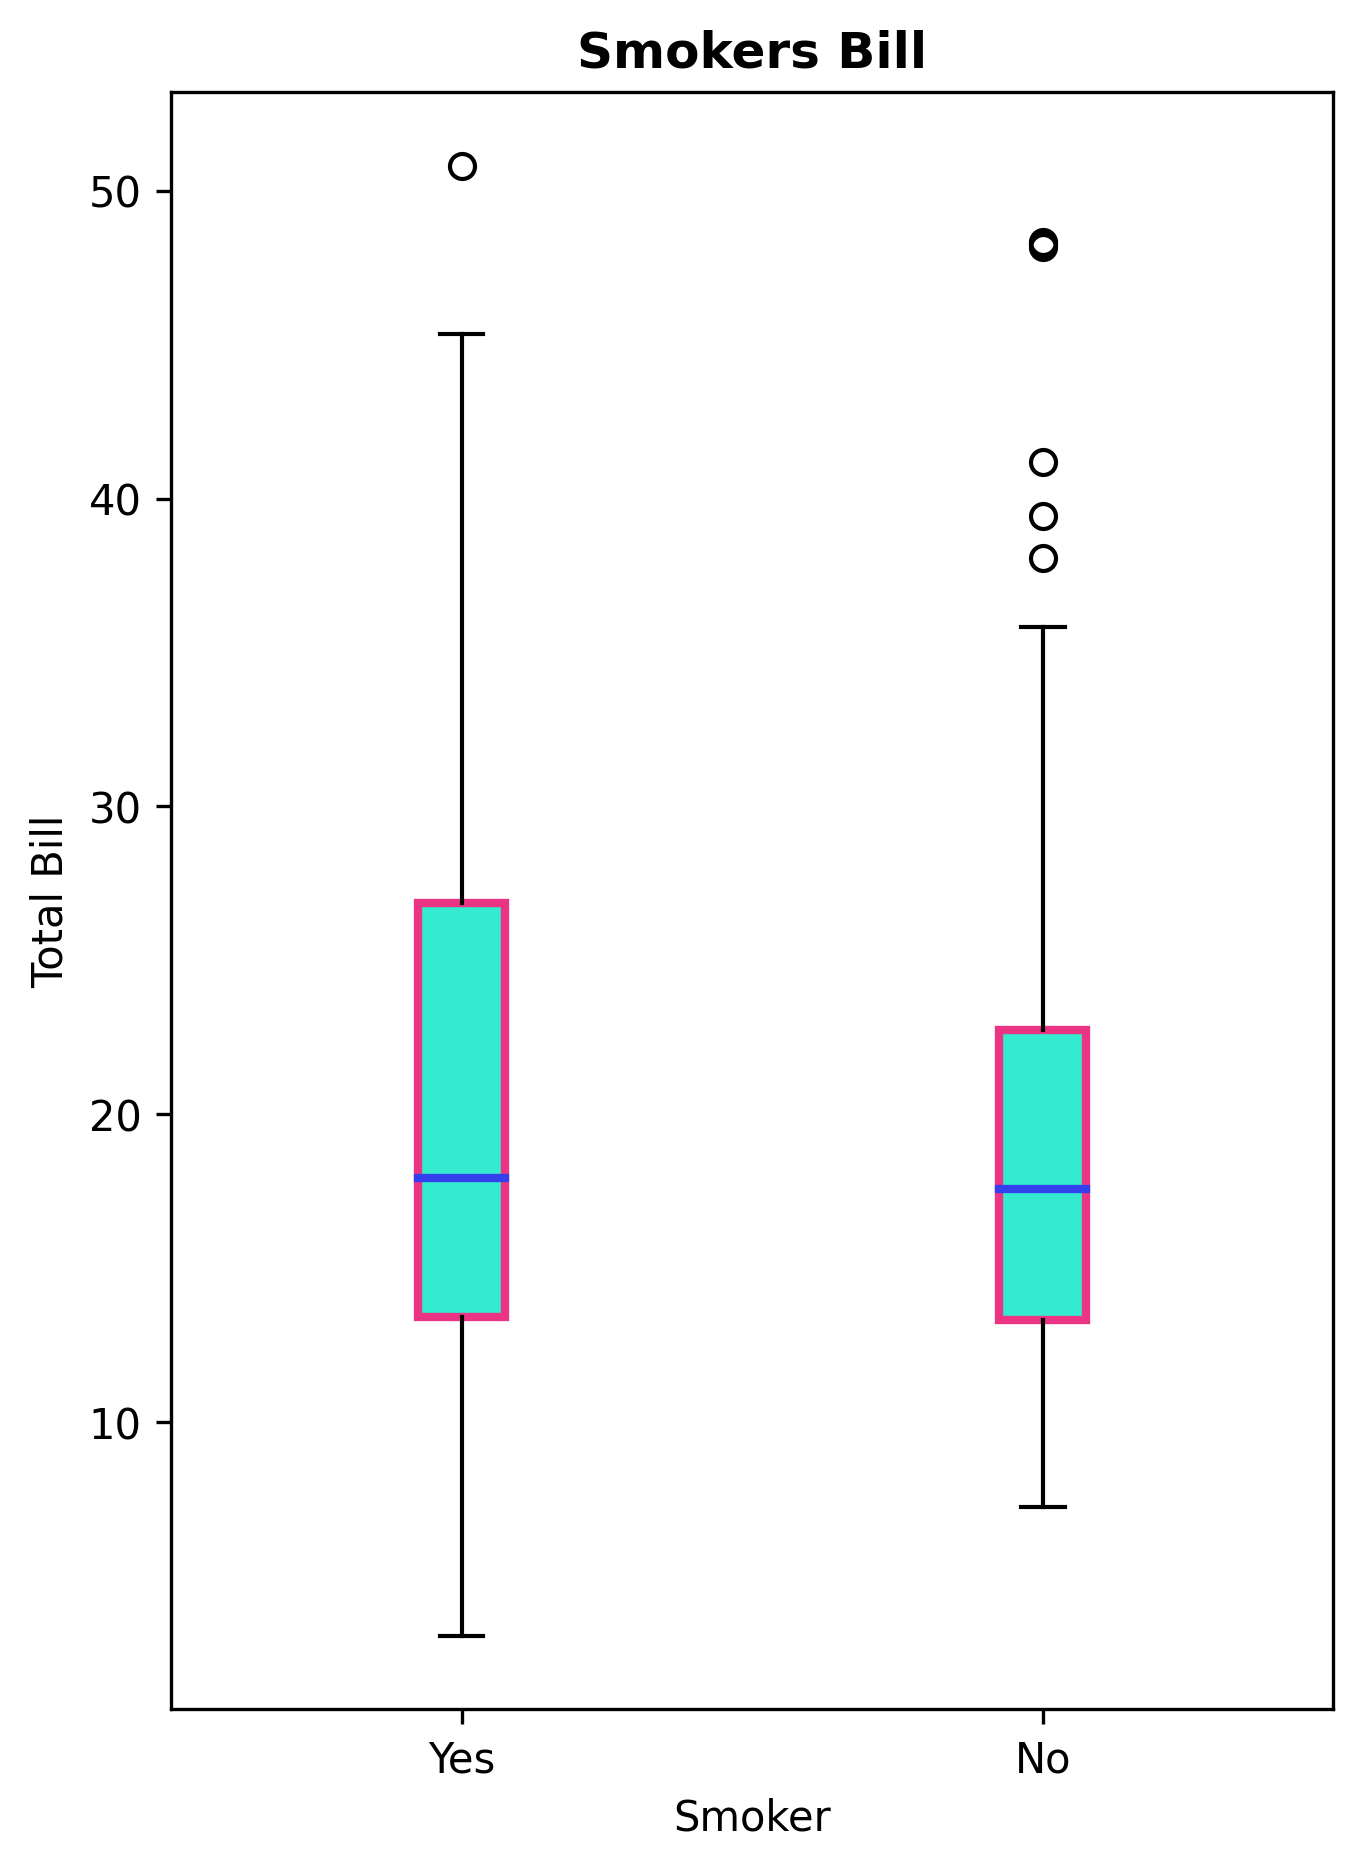

In [13]:
#box plot for smokers

plt.figure(figsize=(5,7), dpi=300)

#Extracting smokers and non-smokers plus each customer's tip rate
smokers=df.loc[df['smoker']=="Yes"]['total_bill']
nonsmokers=df.loc[df['smoker']=="No"]['total_bill']

#ploting smokers vs non-smokers box plot based on their tip rate
figure1= plt.boxplot([smokers,nonsmokers], labels=["Yes","No"], patch_artist=True, medianprops={'linewidth':2, 'color':"#3440eb"})

#labeling the plot
plt.xlabel("Smoker")
plt.ylabel("Total Bill")

#adding colors and features to the boxes
for box in figure1['boxes']:
    box.set(color="#eb3483", facecolor="#34ebd0", linewidth=2)

plt.title("Smokers Bill", fontdict={'fontweight' : 'bold'})
plt.show()

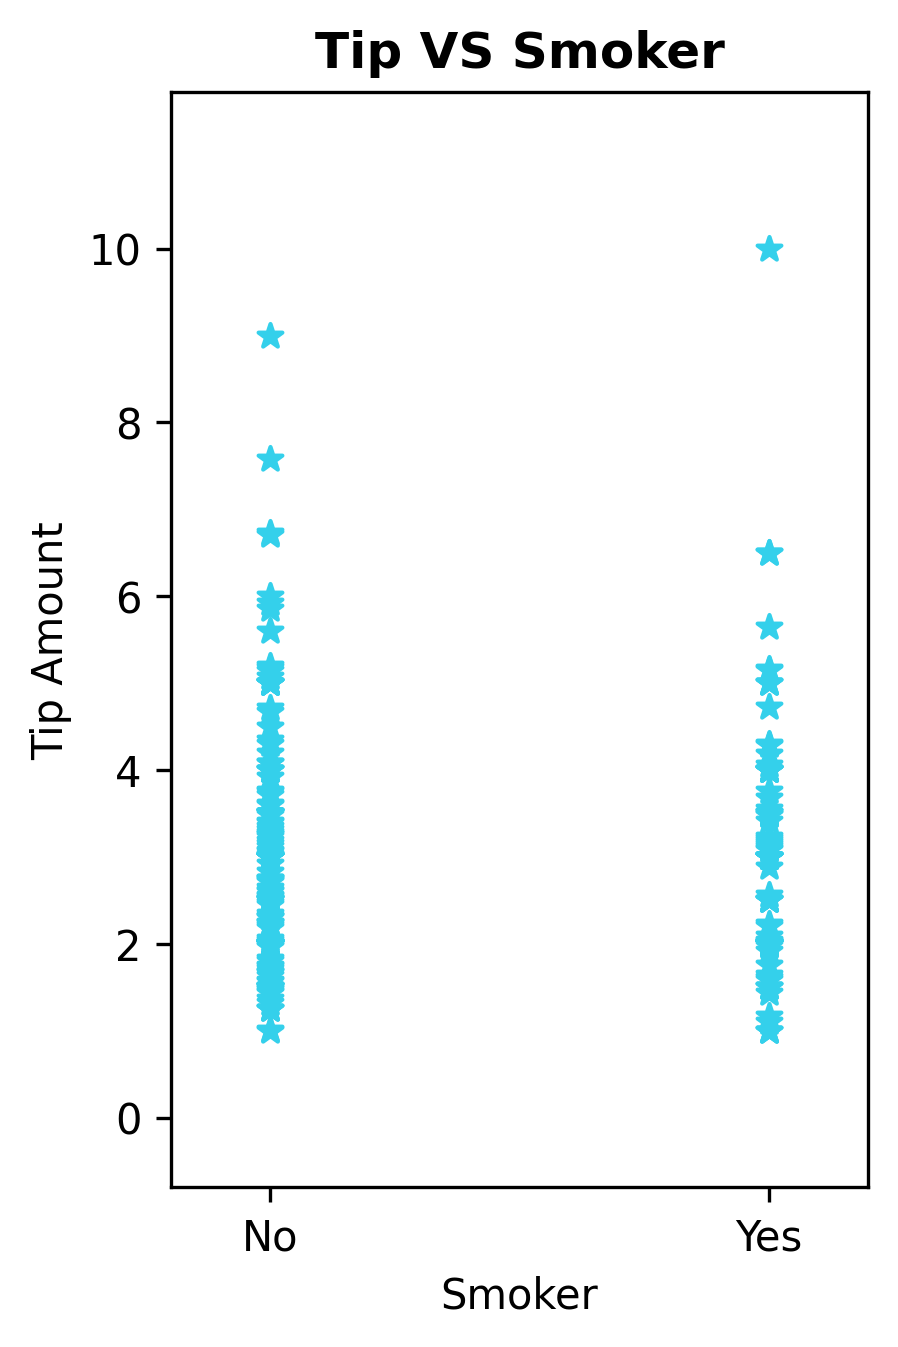

In [11]:
# Scatter plot of smoker vs tip
plt.figure(figsize=(3,5),dpi=300)
plt.scatter(df['smoker'],df['tip'],c="#34d0eb", marker='*')
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

#Labeling scatter plot
plt.xlabel("Smoker")
plt.ylabel("Tip Amount")

#Title
plt.title("Tip VS Smoker", fontdict={'fontweight':'bold'})
plt.show()

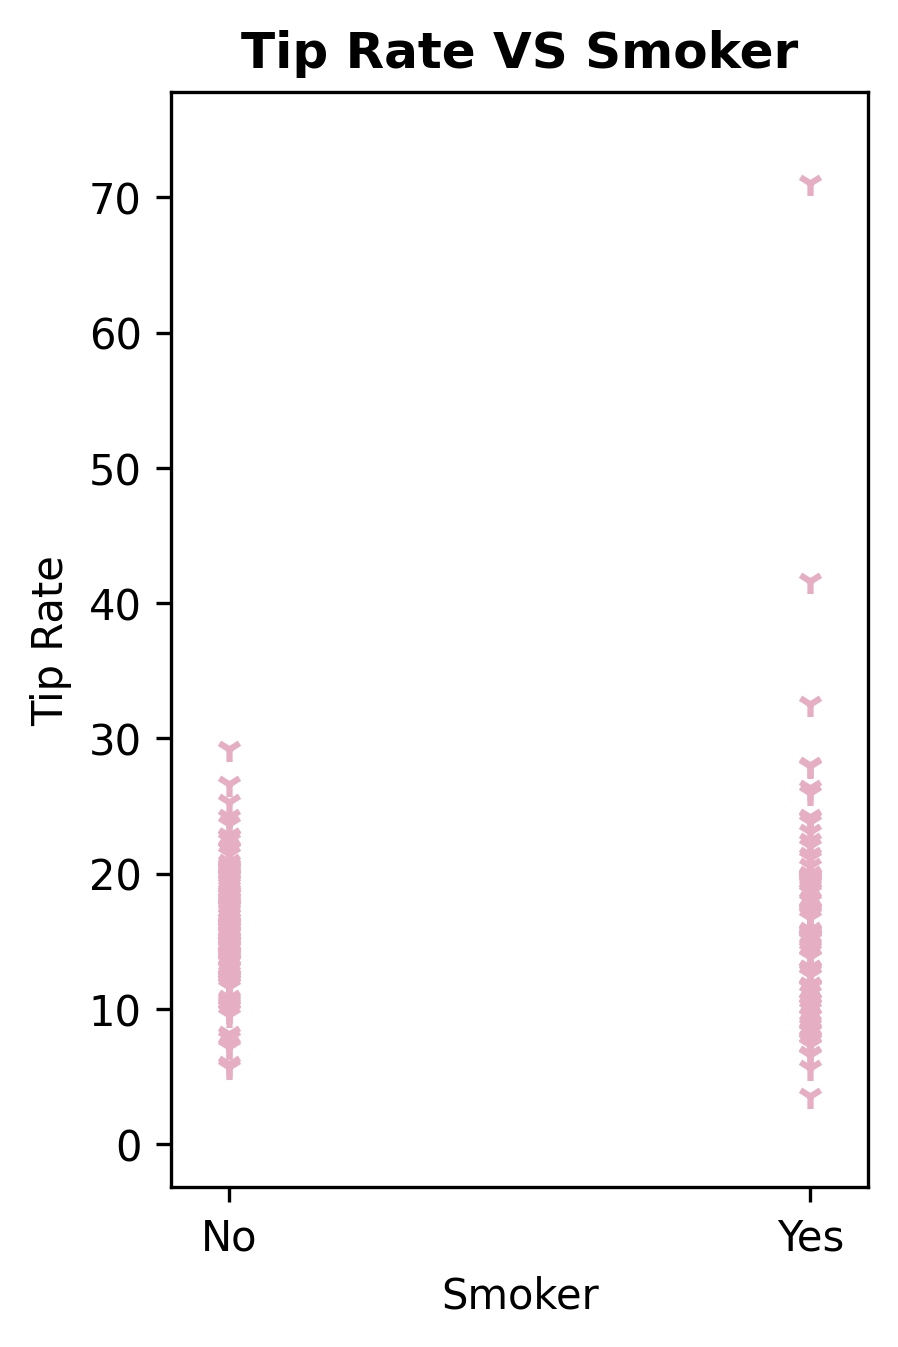

In [33]:
# Scatter plot of smoker vs tip_rate
plt.figure(figsize=(3,5),dpi=300)
plt.scatter(df['smoker'],df['tip_rate'],c="#e6aec3", marker='1')
plt.margins(0.1)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

#Labeling scatter plot
plt.xlabel("Smoker")
plt.ylabel("Tip Rate")

#Title
plt.title("Tip Rate VS Smoker", fontdict={'fontweight':'bold'})
plt.show()

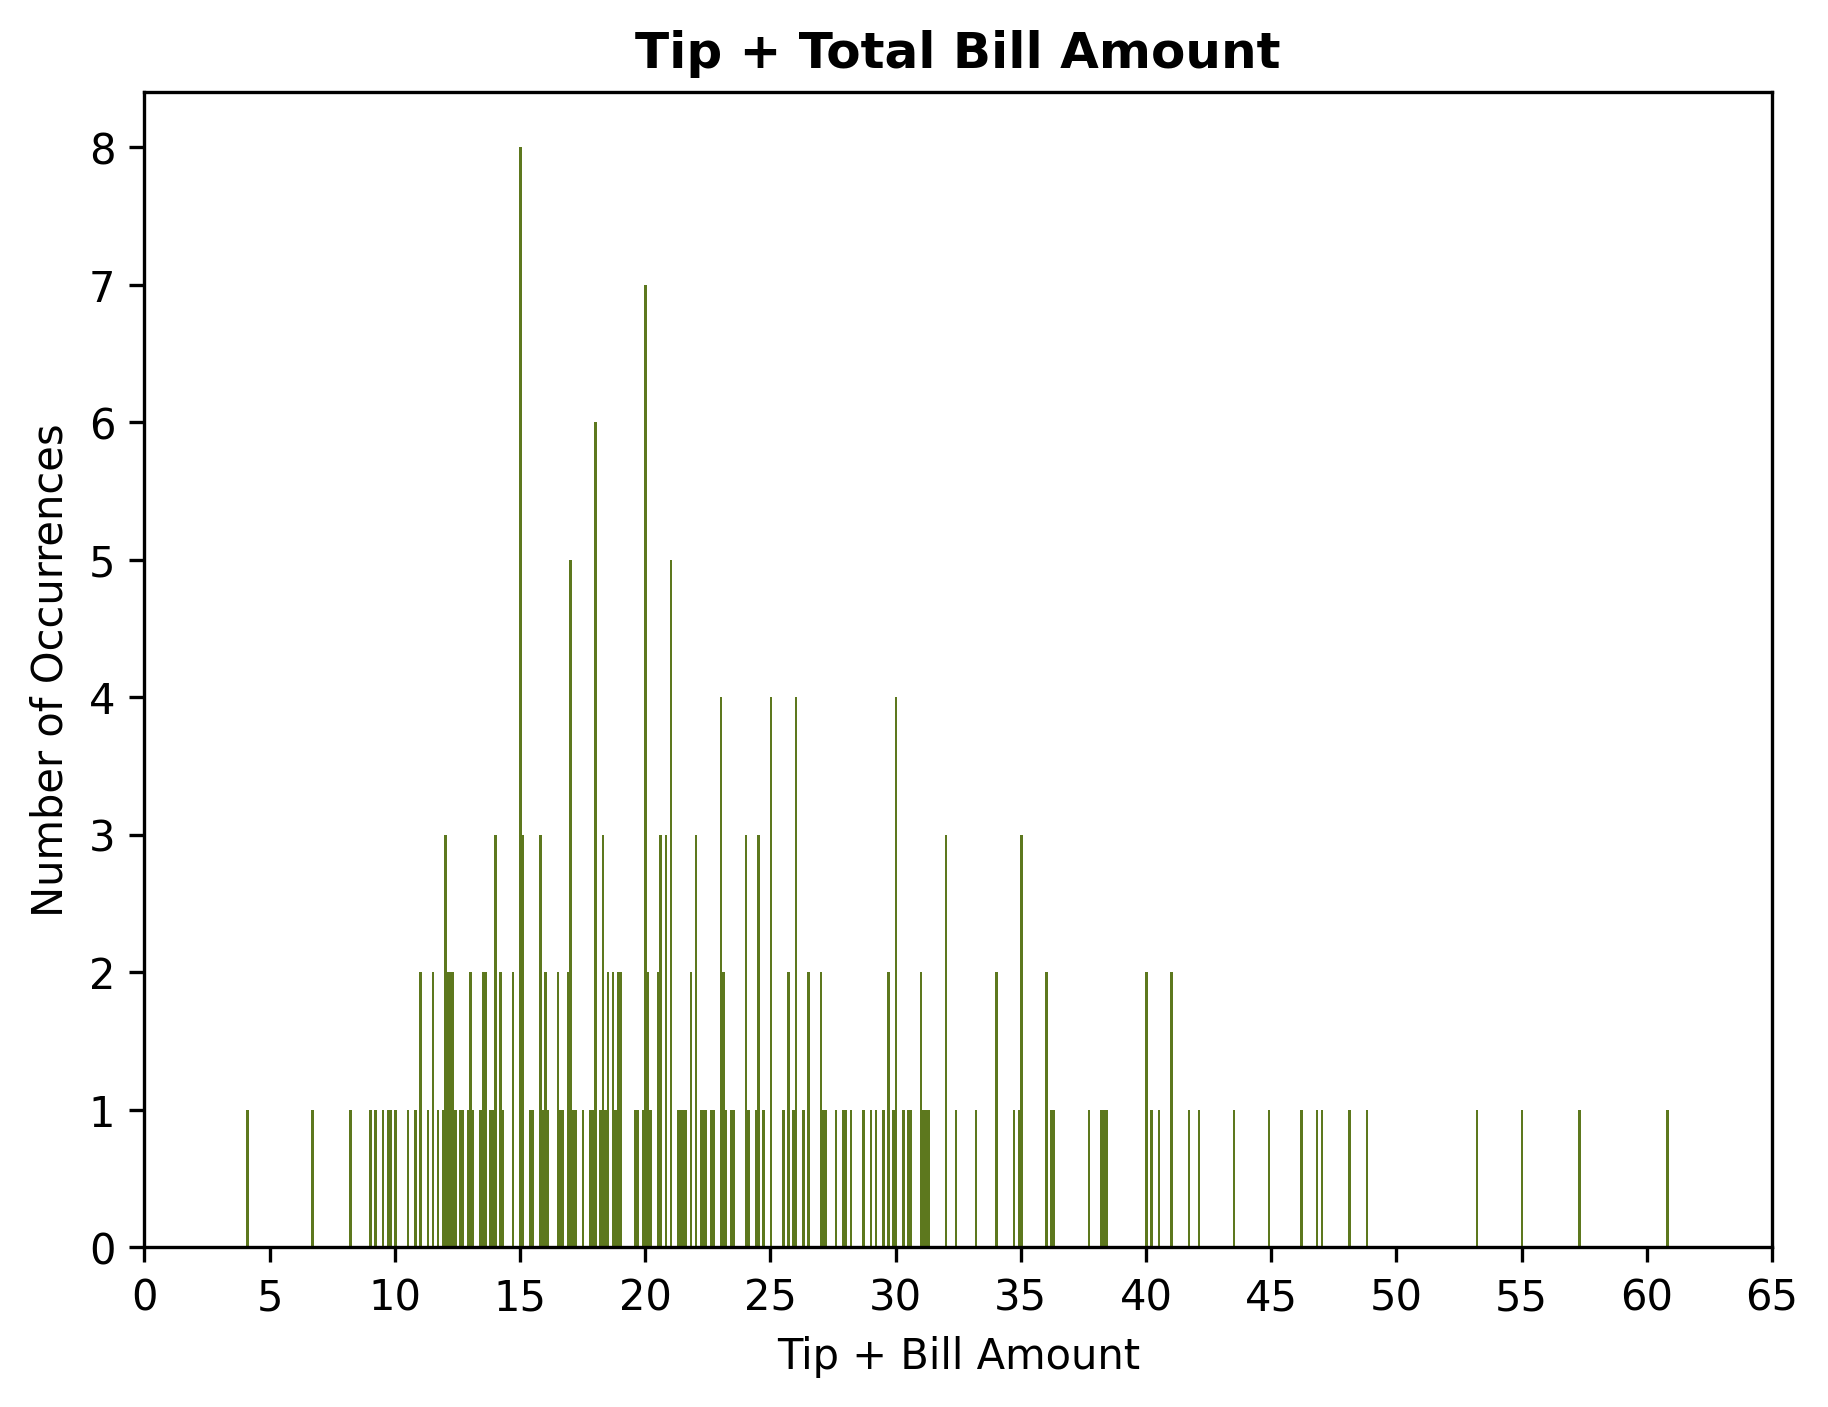

In [50]:
#histogram of the sum of tip plu total bills
plt.figure(figsize=(7,5), dpi=300)

#finding the maximum and minimum values to figure out the range for the bins
tip_min=df['tip'].min()
tip_max=df['tip'].max()
totalBill_min=df['total_bill'].min()
totalBill_max=df['total_bill'].max()
min_value=tip_min + totalBill_min

max_value=tip_max + totalBill_max


#Creating a new column sum
df['sum']=df['tip']+df['total_bill']


#bins cover 10 cents increments
bins = np.arange(min_value,max_value+0.1,0.1)

# Creating histogram
plt.hist(df['sum'],bins=bins,color="#5d781e")

#Title
plt.title("Tip + Total Bill Amount", fontdict={'fontweight':'bold'})

# X and Y Labels
plt.xlabel("Tip + Bill Amount")
plt.ylabel("Number of Occurrences")

#implementing bins
plt.xticks(np.arange(0,66,5))


plt.show()